[View in Colaboratory](https://colab.research.google.com/github/nishi1612/SC374-Computational-and-Numerical-Methods/blob/master/Set_6.ipynb)

Set 6
---



In [0]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from google.colab import files
number = 0

In [0]:
def graph_details():
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.savefig('Graph_' + str(number) + '.png')
    files.download('Graph_' + str(number) + '.png')
    plt.show()

def linear_lagrange(a,x):
    y = a[1]*(x - a[2])/(a[0] - a[2]) + a[3]*(x - a[0])/(a[2] - a[0])
    plt.plot(x,y,color='blue',label='Linear Lagrange')
    graph_details()
    return y

def quadratic_lagrange(a,x):
    t = a[1]*(x-a[2])*(x-a[4])
    s = (a[0]-a[2])*(a[0]-a[4])
    j = t/s
    m = a[5]*(x-a[0])*(x-a[2])
    n = (a[4]-a[0])*(a[4]-a[2])
    i = m/n
    k = a[3]*(x-a[4])*(x-a[0])
    y = (a[2]-a[4])*(a[2]-a[0])
    l = k/y
    y = j + l + i
    plt.plot(x,y,color='blue',label='Quadratic Lagrange')
    graph_details()
    return y

def cubic_lagrange(a,x):
    t = a[1]*(x-a[2])*(x-a[4])*(x-a[6])
    s = (a[0]-a[2])*(a[0]-a[4])*(a[0]-a[6])
    j = t/s
    k = a[3]*(x-a[4])*(x-a[0])*(x-a[6])
    y = (a[2]-a[4])*(a[2]-a[0])*(a[2]-a[6])
    l = k/y
    m = a[5]*(x-a[0])*(x-a[2])*(x-a[6])
    n = (a[4]-a[0])*(a[4]-a[2])*(a[4]-a[6])
    i = m/n
    v = a[7]*(x-a[0])*(x-a[2])*(x-a[4])
    w = (a[6]-a[0])*(a[6]-a[2])*(a[6]-a[4])
    u = v/w
    y = j + l + i + u
    plt.plot(x,y,color='blue',label='Cubic Lagrange')
    graph_details()
    return y

In [0]:
def zero_newton(a,x):
    return a[1]

def one_newton(a,x,f):
    y = zero_newton(a,x) + ((x-a[0])*(a[1]-a[3])/(a[0]-a[2]))
    if(f==1):
        plt.plot(x,y,color = 'blue',label='First Order Newton Divided Difference')
        plt.legend()
        plt.grid(True)
        plt.savefig('Graph_' + str(number) + '.png')
        files.download('Graph_' + str(number) + '.png')
        plt.show()
    return y

def func_one(x1,x2,y1,y2):
    return (y2 - y1) / (x2 - x1)

def two_newton(a,x,f):
    j = a[4] - a[0]
    i = func_one(a[2],a[4],a[3],a[5])
    k = func_one(a[0],a[2],a[1],a[3])
    j = (i - k) / j
    y = one_newton(a,x,0) + ((x-a[0])*(x-a[2])*j)
    if(f==1):
        plt.plot(x,y,color = 'blue',label='Second Order Newton Divided Difference')
        plt.legend()
        plt.grid(True)
        plt.savefig('Graph_' + str(number) + '.png')
        files.download('Graph_' + str(number) + '.png')
        plt.show()
    return y 

def func_two(x1,x2,x3,y1,y2,y3):
    a = func_one(x1,x2,y1,y2)
    b = func_one(x2,x3,y2,y3)
    return (b - a) / (x3 - x1)

def three_newton(a,x):
    j = a[6] - a[0]
    k = func_two(a[2],a[4],a[6],a[3],a[5],a[7]) - func_two(a[0],a[2],a[4],a[1],a[3],a[5])
    y = two_newton(a,x,0) + ((x-a[0])*(x-a[2])*(x-a[4])*k/j)
    plt.plot(x,y,color = 'blue',label='Third Order Newton Divided Difference')
    plt.legend()
    plt.grid(True)
    plt.savefig('Graph_' + str(number) + '.png')
    files.download('Graph_' + str(number) + '.png')
    plt.show()
    return y

In [0]:
def graph():
    plt.ylabel('Error')
    plt.xlabel('x')
    plt.grid(True)
    plt.savefig('Graph_' + str(number) + '.png')
    files.download('Graph_' + str(number) + '.png')
    plt.show()

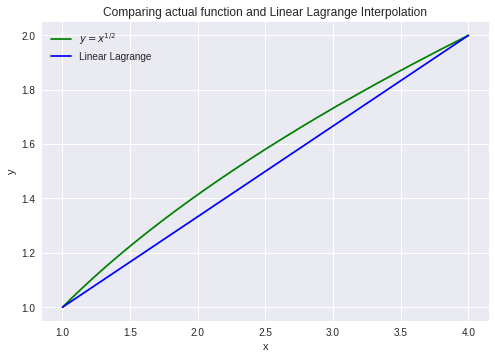

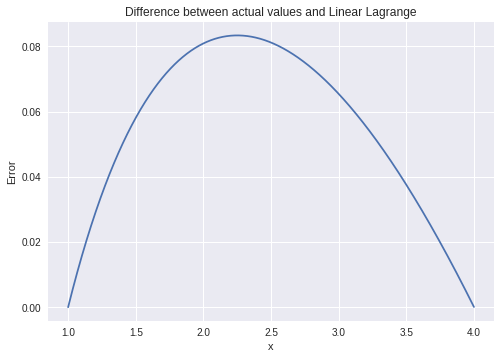

In [18]:
number = 1
point1 = [1,1]
point2 = [4,2]
a = point1 + point2
x = np.arange(a[0],a[2],0.001)
plt.plot(x,np.sqrt(x),color='green',label='$y = x^{1/2}$')
plt.title('Comparing actual function and Linear Lagrange Interpolation')
y = linear_lagrange(a,x)
plt.plot(x,np.sqrt(x)-y)
plt.title('Difference between actual values and Linear Lagrange')
graph()

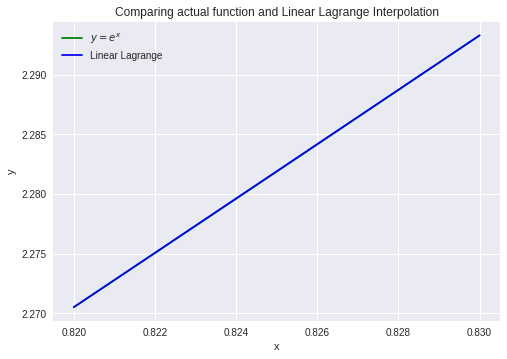

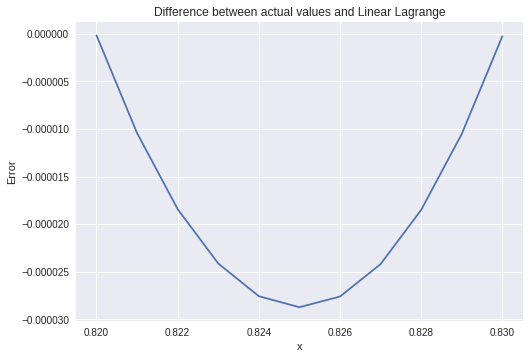

In [19]:
number = 2
point1 = [0.82,2.270500]
point2 = [0.83,2.293319]
a = point1 + point2
x = np.arange(a[0],a[2],0.001)
plt.plot(x,np.exp(x),color='green',label='$y = e^{x}$')
plt.title('Comparing actual function and Linear Lagrange Interpolation')
y = linear_lagrange(a,x)
plt.plot(x,np.exp(x) - y)
plt.title('Difference between actual values and Linear Lagrange')
graph()

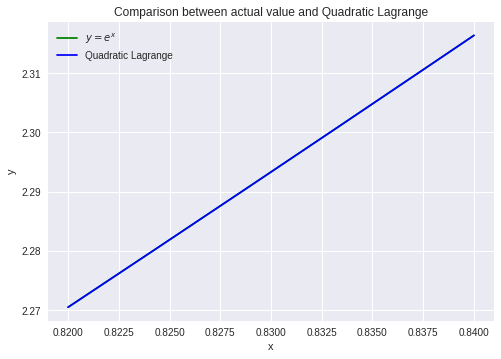

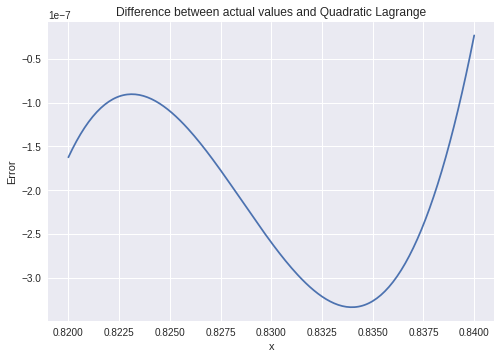

In [20]:
point1 = [0.82,2.270500]
point2 = [0.83,2.293319]
point3 = [0.84,2.316367]
a = point1 + point2 + point3
x = np.arange(a[0],a[4],0.0001)
plt.plot(x,np.exp(x),color='green',label='$y = e^{x}$')
plt.title('Comparison between actual value and Quadratic Lagrange')
y = quadratic_lagrange(a,x)
plt.plot(x,np.exp(x) - y)
plt.title('Difference between actual values and Quadratic Lagrange')
graph()

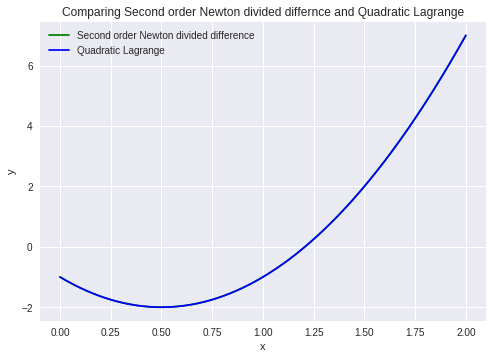

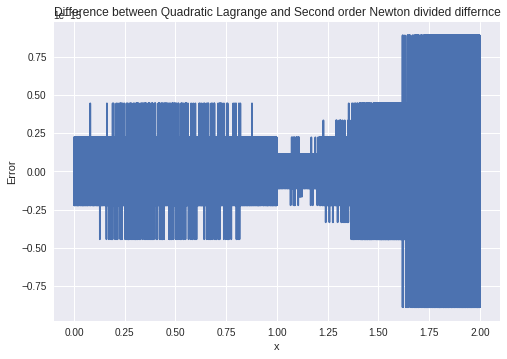

In [21]:
number = 3
point1 = [0,-1]
point2 = [1,-1]
point3 = [2,7]
a = point1 + point2 + point3
x = np.arange(a[0],a[4],0.0001)
y1 = two_newton(a,x,0)
plt.plot(x,y1,color='green',label='Second order Newton divided difference')
plt.title('Comparing Second order Newton divided differnce and Quadratic Lagrange')
y = quadratic_lagrange(a,x)
plt.plot(x,y-y1)
plt.title('Difference between Quadratic Lagrange and Second order Newton divided differnce')
graph()

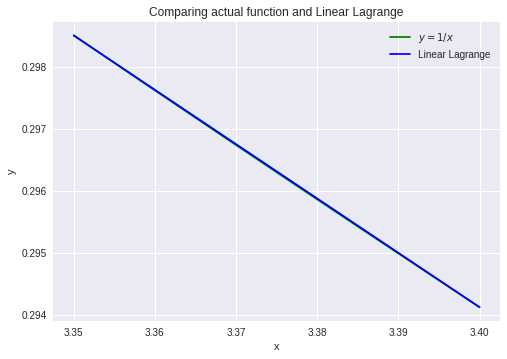

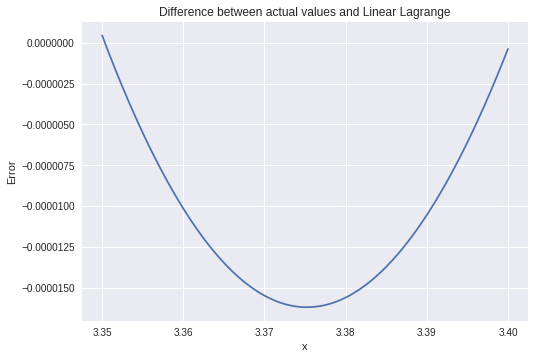

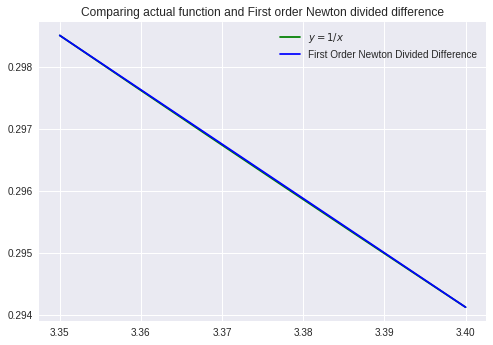

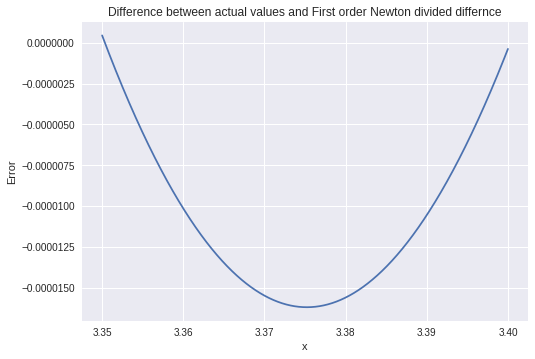

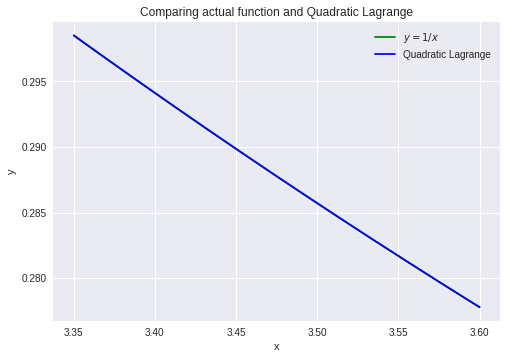

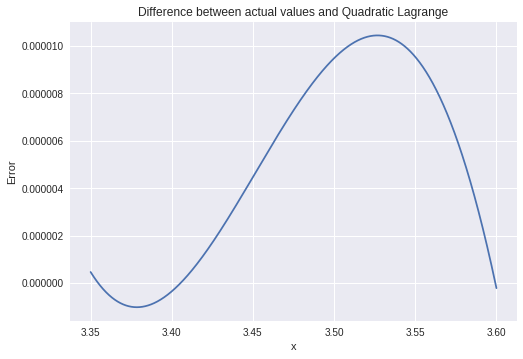

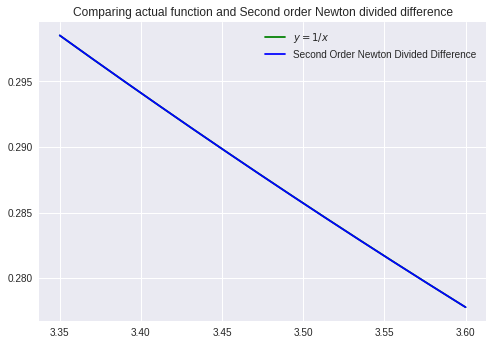

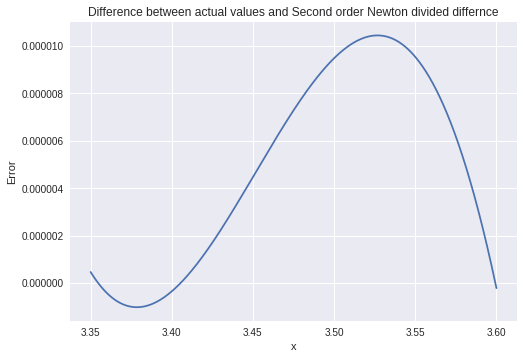

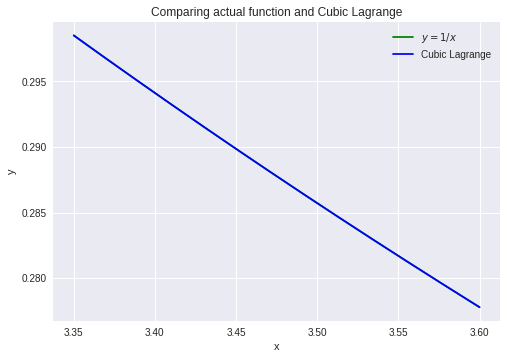

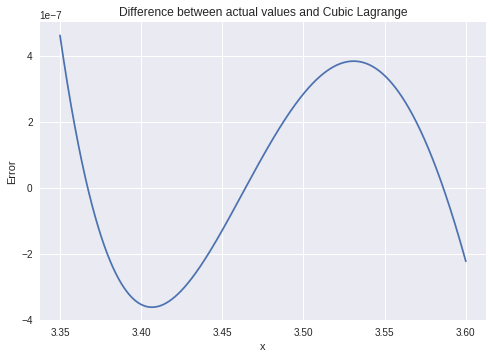

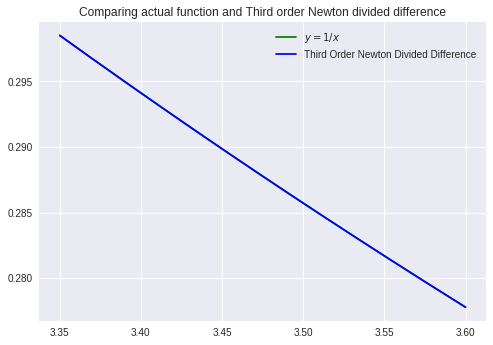

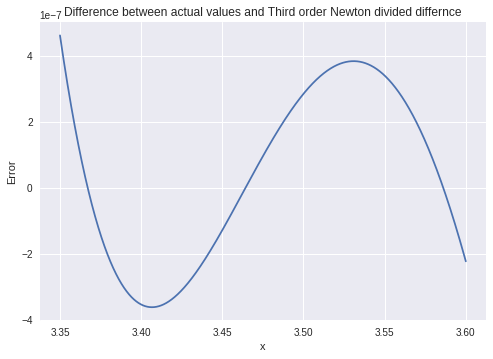

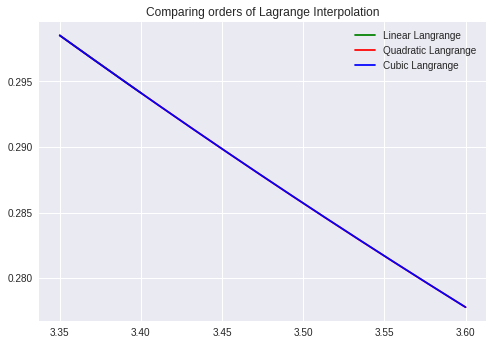

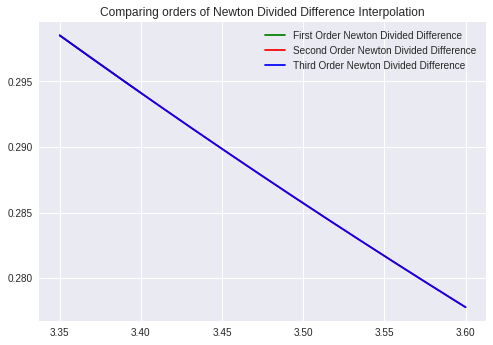

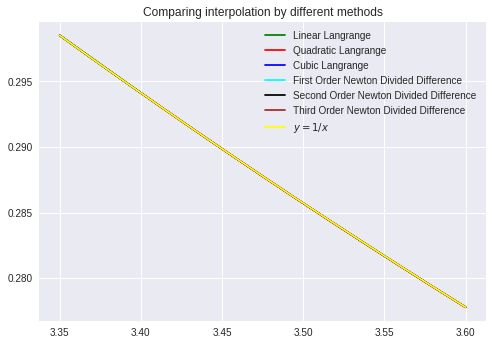

In [22]:
number = 4
point1 = [3.35 , 0.298507]
point2 = [3.40 , 0.294118]
point3 = [3.50 , 0.285714]
point4 = [3.60 , 0.277778]

a = point1 + point2
x1 = np.arange(a[0],a[2],0.00001)
plt.plot(x1,1/x1,color = 'green',label='$y = 1/x$')
plt.title('Comparing actual function and Linear Lagrange')
y1 = linear_lagrange(a,x1)
plt.plot(x1,1/x1 - y1)
plt.title('Difference between actual values and Linear Lagrange')
graph()

plt.plot(x1,1/x1,color = 'green',label='$y = 1/x$')
plt.title('Comparing actual function and First order Newton divided difference')
y1_n = one_newton(a,x1,1)
plt.plot(x1,1/x1 - y1_n)
plt.title('Difference between actual values and First order Newton divided differnce')
graph()

a = point1 + point2 + point4
x2 = np.arange(a[0],a[4],0.00001)
plt.plot(x2,1/x2,color = 'green',label='$y = 1/x$')
plt.title('Comparing actual function and Quadratic Lagrange')
y2 = quadratic_lagrange(a,x2)
plt.plot(x2,1/x2 - y2)
plt.title('Difference between actual values and Quadratic Lagrange')
graph()

plt.plot(x2,1/x2,color = 'green',label='$y = 1/x$')
plt.title('Comparing actual function and Second order Newton divided difference')
y2_n = two_newton(a,x2,1)
plt.plot(x2,1/x2 - y2_n)
plt.title('Difference between actual values and Second order Newton divided differnce')
graph()

a = point1 + point2 + point3 + point4
x3 = np.arange(a[0],a[6],0.00001)
plt.plot(x3,1/x3,color = 'green',label='$y = 1/x$')
plt.title('Comparing actual function and Cubic Lagrange')
y3 = cubic_lagrange(a,x3)
plt.plot(x3,1/x3 - y3)
plt.title('Difference between actual values and Cubic Lagrange')
graph()

plt.plot(x3,1/x3,color = 'green',label='$y = 1/x$')
plt.title('Comparing actual function and Third order Newton divided difference')
y3_n = three_newton(a,x3)
plt.plot(x3,1/x3 - y3_n)
plt.title('Difference between actual values and Third order Newton divided differnce')
graph()

plt.plot(x1,y1,color='green',label='Linear Langrange')
plt.plot(x2,y2,color='red',label='Quadratic Langrange')
plt.plot(x3,y3,color='blue',label='Cubic Langrange')
plt.legend()
plt.grid(True)
plt.title('Comparing orders of Lagrange Interpolation')
plt.show()

plt.plot(x1,y1_n,color='green',label='First Order Newton Divided Difference')
plt.plot(x2,y2_n,color='red',label='Second Order Newton Divided Difference')
plt.plot(x3,y3_n,color='blue',label='Third Order Newton Divided Difference')
plt.legend()
plt.grid(True)
plt.title('Comparing orders of Newton Divided Difference Interpolation')
plt.show()

plt.plot(x1,y1,color='green',label='Linear Langrange')
plt.plot(x2,y2,color='red',label='Quadratic Langrange')
plt.plot(x3,y3,color='blue',label='Cubic Langrange')
plt.plot(x1,y1_n,color='cyan',label='First Order Newton Divided Difference')
plt.plot(x2,y2_n,color='black',label='Second Order Newton Divided Difference')
plt.plot(x3,y3_n,color='brown',label='Third Order Newton Divided Difference')
plt.plot(x3,1/x3,color = 'yellow' , label = '$y = 1/x$')
plt.legend()
plt.grid(True)
plt.title('Comparing interpolation by different methods')
plt.show()

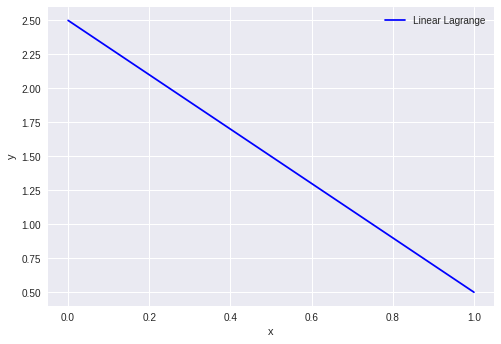

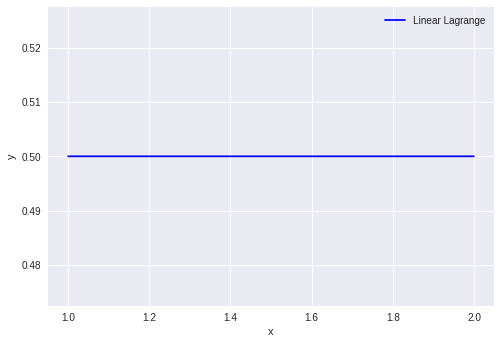

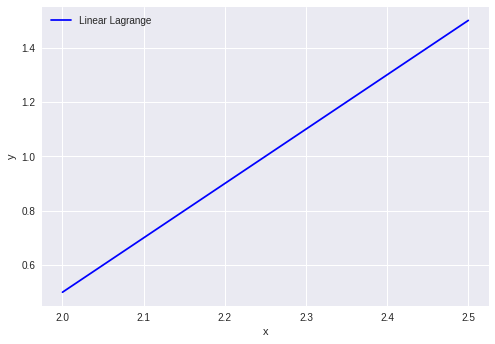

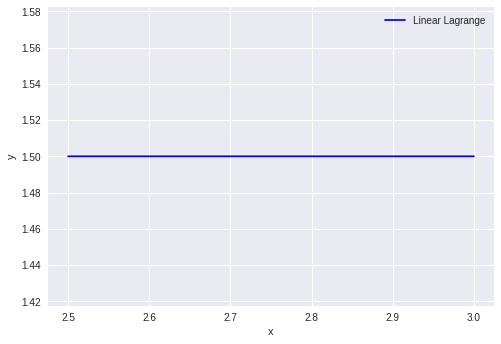

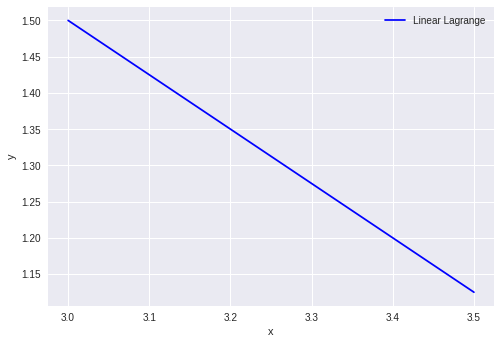

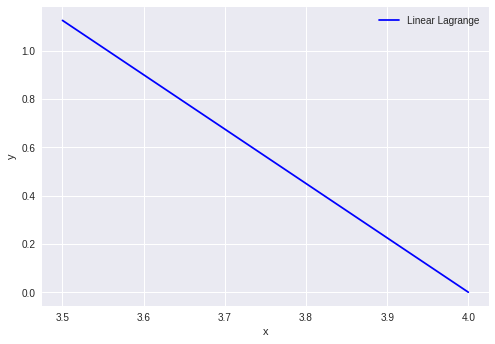

No handles with labels found to put in legend.


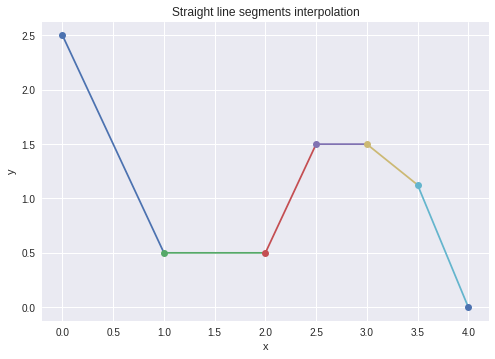

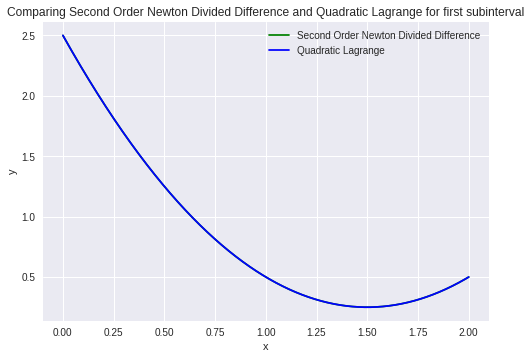

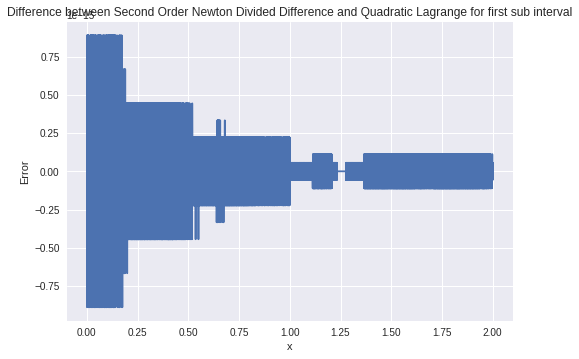

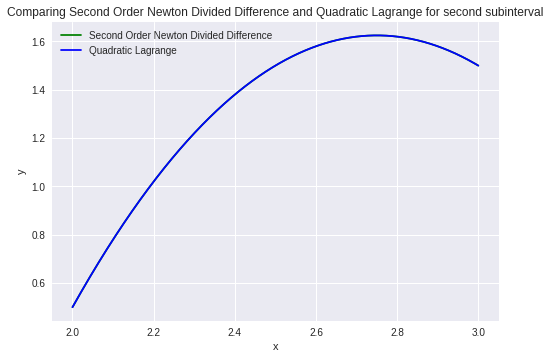

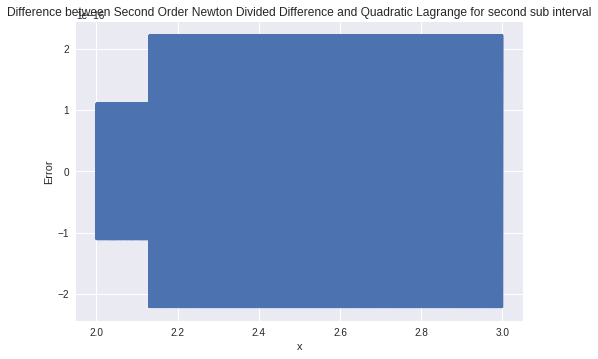

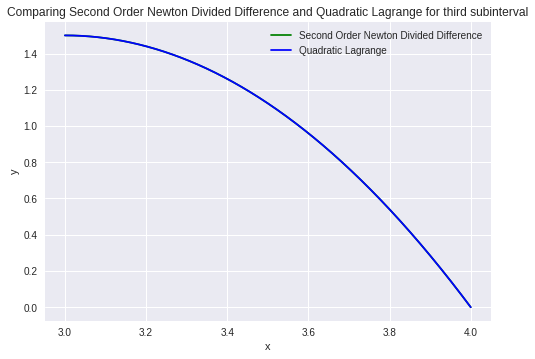

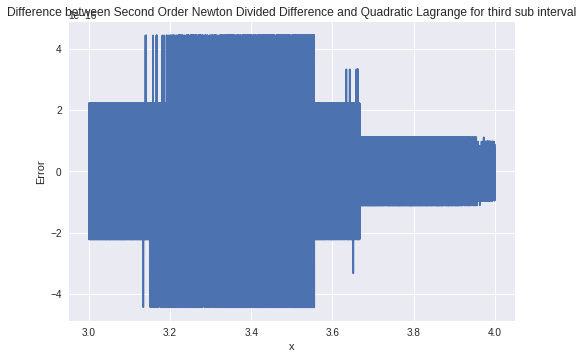

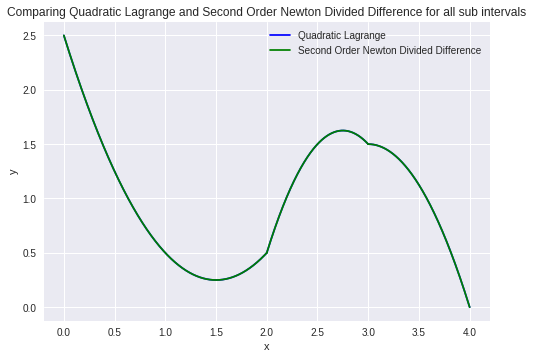

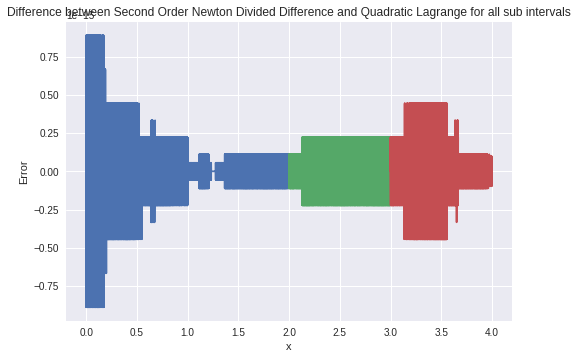

In [23]:
number = 5
point1 = [0 , 2.5]
point2 = [1 , 0.5]
point3 = [2 , 0.5]
point4 = [2.5 , 1.5]
point5 = [3 , 1.5]
point6 = [3.5 , 1.125]
point7 = [4 , 0]

a = point1 + point2
x1 = np.arange(a[0],a[2],0.00001)
y1 = linear_lagrange(a,x1)

a = point2 + point3
x2 = np.arange(a[0],a[2],0.00001)
y2 = linear_lagrange(a,x2)

a = point3 + point4
x3 = np.arange(a[0],a[2],0.00001)
y3 = linear_lagrange(a,x3)

a = point4 + point5
x4 = np.arange(a[0],a[2],0.00001)
y4 = linear_lagrange(a,x4)

a = point5 + point6
x5 = np.arange(a[0],a[2],0.00001)
y5 = linear_lagrange(a,x5)

a = point6 + point7
x6 = np.arange(a[0],a[2],0.00001)
y6 = linear_lagrange(a,x6)

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)
plt.plot(x6,y6)
plt.plot(point1[0],point1[1],marker='o')
plt.plot(point2[0],point2[1],marker='o')
plt.plot(point3[0],point3[1],marker='o')
plt.plot(point4[0],point4[1],marker='o')
plt.plot(point5[0],point5[1],marker='o')
plt.plot(point6[0],point6[1],marker='o')
plt.plot(point7[0],point7[1],marker='o')
plt.title('Straight line segments interpolation')
graph_details()

a = point1 + point2 + point3
x7 = np.arange(a[0],a[4],0.00001)
y7_n = two_newton(a,x7,0)
plt.plot(x7,y7_n,color='green',label='Second Order Newton Divided Difference')
plt.title('Comparing Second Order Newton Divided Difference and Quadratic Lagrange for first subinterval')
y7 = quadratic_lagrange(a,x7)
plt.plot(x7,y7_n-y7)
plt.title('Difference between Second Order Newton Divided Difference and Quadratic Lagrange for first sub interval')
graph()

a = point3 + point4 + point5
x8 = np.arange(a[0],a[4],0.00001)
y8_n = two_newton(a,x8,0)
plt.plot(x8,y8_n,color='green',label='Second Order Newton Divided Difference')
plt.title('Comparing Second Order Newton Divided Difference and Quadratic Lagrange for second subinterval')
y8 = quadratic_lagrange(a,x8)
plt.plot(x8,y8_n-y8)
plt.title('Difference between Second Order Newton Divided Difference and Quadratic Lagrange for second sub interval')
graph()

a = point5 + point6 + point7
x9 = np.arange(a[0],a[4],0.00001)
y9_n = two_newton(a,x9,0)
plt.plot(x9,y9_n,color='green',label='Second Order Newton Divided Difference')
plt.title('Comparing Second Order Newton Divided Difference and Quadratic Lagrange for third subinterval')
y9 = quadratic_lagrange(a,x9)
plt.plot(x9,y9_n-y9)
plt.title('Difference between Second Order Newton Divided Difference and Quadratic Lagrange for third sub interval')
graph()

plt.plot(x7,y7,color='blue',label='Quadratic Lagrange')
plt.plot(x8,y8,color='blue')
plt.plot(x9,y9,color='blue')
plt.plot(x7,y7_n,color='green',label='Second Order Newton Divided Difference')
plt.plot(x8,y8_n,color='green')
plt.plot(x9,y9_n,color='green')
plt.title('Comparing Quadratic Lagrange and Second Order Newton Divided Difference for all sub intervals')
graph_details()

plt.plot(x7,y7_n-y7)
plt.plot(x8,y8_n-y8)
plt.plot(x9,y9_n-y9)
plt.title('Difference between Second Order Newton Divided Difference and Quadratic Lagrange for all sub intervals')
graph()